# 2-D dynamical systems in neuroscience

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from PIL.ImageOps import scale
from cycler import cycler
import seaborn as sns

palette = sns.color_palette("Set2")
plt.rc('axes', prop_cycle=cycler(color=palette))
plt.style.use(['science', 'grid', 'custom'])

## base model 
($I_{\text{Na,p}}+I_{K}$ model) 

$$
\begin{gather}
C\dot{V} = I - \underbrace{g_{\text{L}}(V - E_{\text{L}})}_{\text{leak current}} + \underbrace{g_{\text{Na}}m_{\infty}(V)(V - E_{\text{Na}})}_{\text{instantaneous sodium current}} - \underbrace{g_{\text{K}}\cdot n\cdot(V - E_{\text{K}})}_{\text{slow potassium current}} \\ \\
\dot{n} = \frac{n_{\infty}(V) - n}{\tau(V)}
\end{gather}
$$



In [69]:
# biophysical parameters

C = 1.0
I = 0.0

E_L_high = -80.0 #mV
E_L_low = -78 #mV
g_L = 8.0 # mS/cm^2

E_Na = 60.0 # mV
g_Na = 20.0 # mS/cm^2

E_K = -90.0 # mV
g_K = 10.0 # mS/cm^2

tau = 1.0 # ms

def boltzmann(V, V_half, k):
    return 1 / (1 + np.exp((V_half - V) / k))

m_inf = lambda V : boltzmann(V, -20.0, 15.0)
n_inf_high = lambda V : boltzmann(V, -25.0, 5.0)
n_inf_low = lambda V : boltzmann(V, -45.0, 5.0)

def dV_high(V, n):
    return (I - g_L*(V - E_L_high) - g_Na*m_inf(V)*(V - E_Na) - g_K*n*(V - E_K)) / C

def dn_high(V, n):
    return (n_inf_high(V) - n) / tau

def dV_low(V, n):
    return (I - g_L*(V - E_L_low) - g_Na*m_inf(V)*(V - E_Na) - g_K*n*(V - E_K)) / C

def dn_low(V, n):
    return (n_inf_low(V) - n) / tau


## planar vector fields

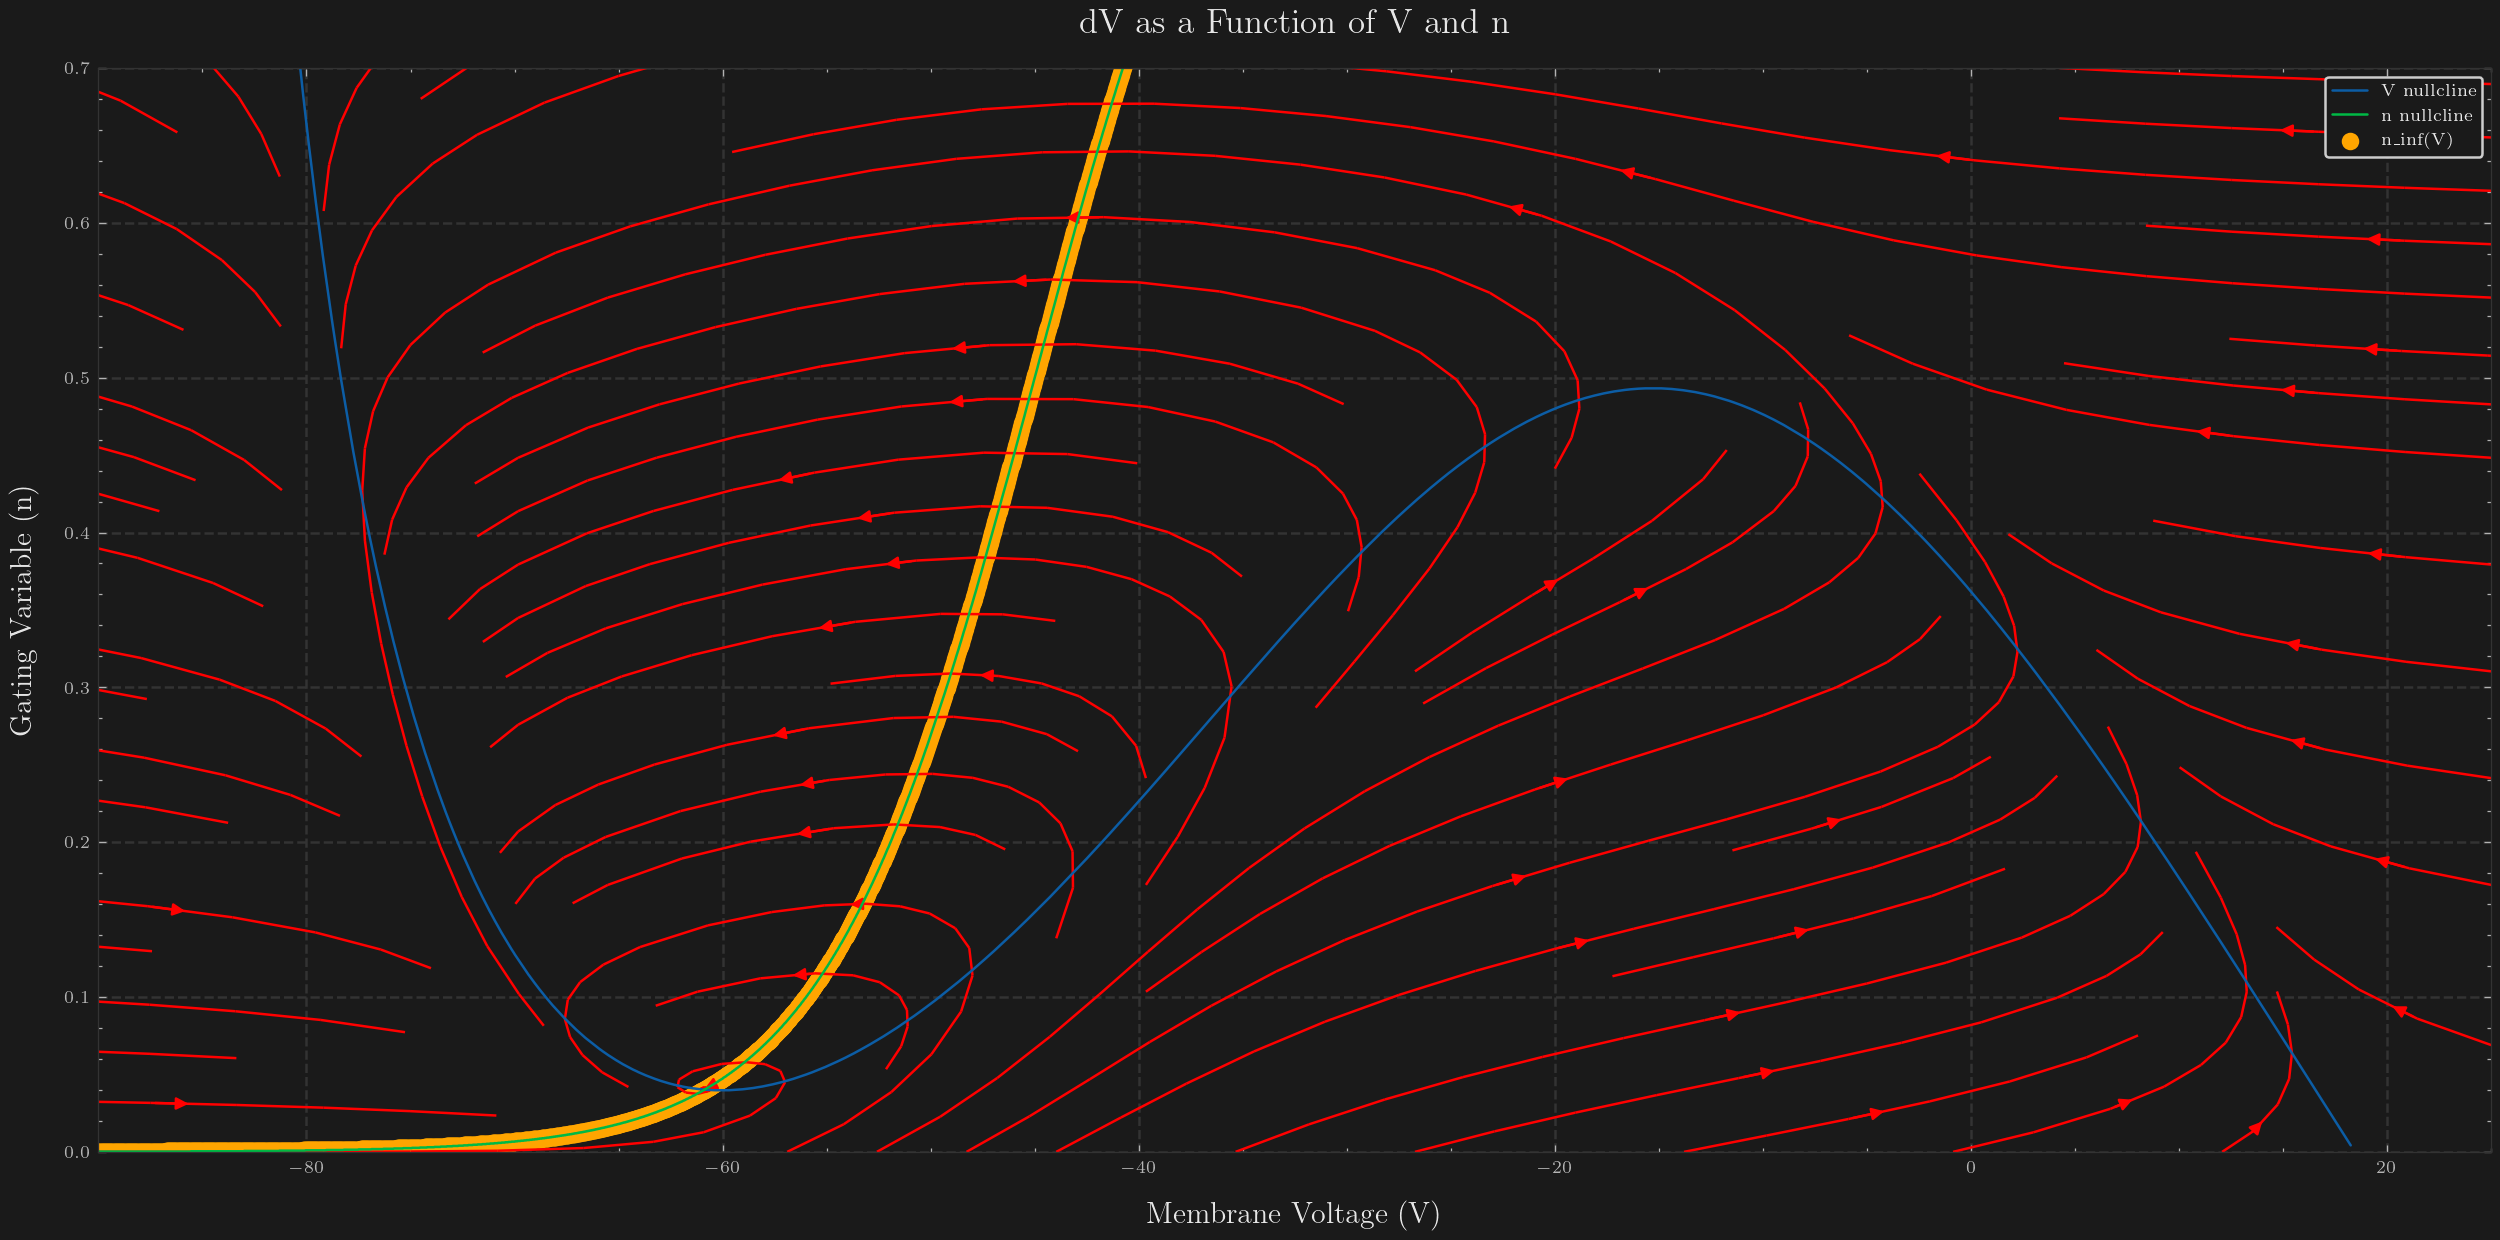

In [114]:
V = np.linspace(-100, 25, 5000)
n = np.linspace(0, 1, 5000)

# n_nullcline_n = n[np.argwhere(np.abs(n_inf_low(V) - n) < 0.01).flatten()]
# n_nullcline_V = V[np.argwhere(np.abs(n_inf_low(V) - n) < 0.01).flatten()]

n_inf = n_inf_low(V)

V_grid, n_grid = np.meshgrid(V, n)

dV_grid = dV_low(V_grid, n_grid)
dn_grid = dn_low(V_grid, n_grid)

V_nullcline_indices = np.argwhere(np.abs(dV_grid) < 0.01)
n_nullcline_indices = np.argwhere(np.abs(dn_grid) < 0.0001)

sorted_V_nullcline_indices = V_nullcline_indices[np.argsort(V_nullcline_indices[:, 1])]

plt.figure(figsize=(14, 7))
plt.streamplot(V_grid, n_grid, dV_grid, dn_grid, color='r', linewidth=1)

plt.plot(V[sorted_V_nullcline_indices[:, 1]], n[sorted_V_nullcline_indices[:, 0]], label="V nullcline")
plt.plot(V[n_nullcline_indices[:, 1]], n[n_nullcline_indices[:, 0]], label="n nullcline")
plt.scatter(V, n_inf, label="n_inf(V)", color ='orange')

plt.xlabel("Membrane Voltage (V)", fontsize=12)
plt.ylabel("Gating Variable (n)", fontsize=12)
plt.title("dV as a Function of V and n", fontsize=14)

plt.xlim(-90, 25)
plt.ylim(0, 0.7)

plt.legend()
plt.tight_layout()
plt.show()
